# Sympy-Numpy conversión
© 2020
Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza    

--- 

Adaptado de: https://youtu.be/je8GW3aqmzc

In [1]:
# bibliotecas de cálculo numérico y graficación
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Oscilador armónico amortiguado
Supongamos que tenemos la solución 
$$
x(t) = \operatorname{e}^{- \beta t} \left( A \cos(\omega t) + B \sin(\omega t) \right),
$$
para los que conocemos las condiciones iniciales
$$
x(0) = 10 \\
v(0) = 2
$$
y los parámetros son
$$
\beta = 0.2\,\mathrm{1/s} \\
k = 30 \,\mathrm{N/m} \\
m = 1\,\mathrm{kg}
$$

# Escribiendo las ecuaciones en forma simbólica

In [2]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [6]:
# defino los símbolos a utilizar
β, k, m, ω = sym.symbols(' β, k, m, ω ', positive= True)
A, B, t = sym.symbols('A, B, t') 

# la función x(t)
x = sym.exp(- β* t)* (A* sym.cos(ω* t) + B* sym.sin(ω* t) )
x0, v0 = sym.symbols('x_0, v_0') 
x

In [7]:
# soluciones
# solve | resuelve un sistema algebráico, asume que igual a 0, si es un sistema requiere una lista []
# subs | substituye una variable por otra o un valor
sols = sym.solve([x.subs(t,0)- x0, x.diff(t).subs(t,0)- v0])  # sistema x y x punto igualados a sus condiciones iniciales 
sols

In [8]:
x.subs(sols[0]) # substituye con la primer y única solución en el diccionario [0] que devolvió solve

In [11]:
# escribo los valores numéricos en variables
β_valor = 0.2
k_valor = 30
m_valor = 1
ω_valor = np.sqrt(k_valor/ m_valor)
x0_valor = 10
v0_valor = 2

# un diccionario (un tipo de variable Python) fácilará el reemplazar con valores numéricos
valores = {
    β : β_valor,
    k : k_valor,
    m : m_valor,
    ω : ω_valor,
    x0 : x0_valor,
    v0 : v0_valor
}

In [12]:
x_valores = x.subs(sols[0]).subs(valores)
x_valores

## Graficación
Lo anterior es una expresión _sympy_, necesito pasarla a una expresión que pueda interpretarse fuera de este módulo.
Esto lo hace la función _lambdify_ que retorna una función para el módulo indicado, por defecto _numpy_, en función de la variable indicada.

In [13]:
x_numerica = sym.lambdify(t, x_valores) # variable t

In [14]:
x_numerica(1) # i.e. a t= 1 s

In [17]:
tiempos = np.arange(0,10,0.1) # genero una cantidad de tiempos de interés

[(-1.0, 11.0),
 Text(0.5, 0, 't [s]'),
 Text(0, 0.5, 'x(t)'),
 Text(0.5, 1.0, 'Oscilación amortiguada')]

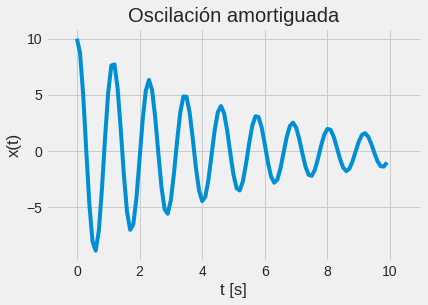

In [18]:
# grafico
# Referencia: https://matplotlib.org/3.2.1/tutorials/introductory/lifecycle.html
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(tiempos, x_numerica(tiempos))
ax.set(xlim=[-1, 11], xlabel='t [s]', ylabel='x(t)',
       title='Oscilación amortiguada')